**source**: data.world/data-society/the-simpsons-by-the-data

**objective**: try datadotworld libraries (esp load_dataset and query), clean simpson dataset

In [1]:
# load libraries
import datadotworld as dw
import pprint as pp
import pandas as pd
import matplotlib as plt
% matplotlib inline
import string

In [2]:
# load dataset
lds = dw.load_dataset('data-society/the-simpsons-by-the-data')

In [3]:
# print with pprint as it makes our output easier to read
pp.pprint(lds.describe())

{'description': 'Contains the characters, locations, episode details, and '
                'script lines for approximately 600 Simpsons episodes.\n'
                '\n'
                'Originally, this dataset was scraped by Tod Schenider for his '
                'post [The Simpsons by the '
                'Data](http://toddwschneider.com/posts/the-simpsons-by-the-data/), '
                'for which he made the scraper [available on '
                'GitHub](https://github.com/toddwschneider/flim-springfield). '
                '[Kaggle user William Cukierski used the scraper to upload the '
                'data '
                'set](https://www.kaggle.com/wcukierski/the-simpsons-by-the-data), '
                'which has been rehosted here.\n'
                '\n'
                'An additional column, `chalkboard_gag`, has been added to the '
                '`simpsons_episodes.csv` file, scraped from [Simpsons '
                'Wiki](http://simpsons.wikia.com/wiki/List_of

Our JSON object has three key/value pairs at the top level: homepage, name, and resources. resources is a list that contains information about each file in our data.world data set: its name, format, and path. In the example above we can see that all four resources in this data set are CSV files.

Along with the LocalDataset.describe() function, there are three key attributes of our LocalDataset object which we can use to access the data itself: LocalDataset.dataframes, LocalDataset.tables, and LocalDataset.raw_data.

Each of these attributes work the same way, but return the data in a different format.

In [4]:
for i in [lds.dataframes, lds.tables, lds.raw_data]:
    print(i,'\n') # pprint does not workon lazy-loaded dicts

{'simpsons_characters': LazyLoadedValue(<pandas.DataFrame>), 'simpsons_episodes': LazyLoadedValue(<pandas.DataFrame>), 'simpsons_locations': LazyLoadedValue(<pandas.DataFrame>), 'simpsons_script_lines': LazyLoadedValue(<pandas.DataFrame>)} 

{'simpsons_characters': LazyLoadedValue(<list of rows>), 'simpsons_episodes': LazyLoadedValue(<list of rows>), 'simpsons_locations': LazyLoadedValue(<list of rows>), 'simpsons_script_lines': LazyLoadedValue(<list of rows>)} 

{'simpsons_characters': LazyLoadedValue(<bytes>), 'simpsons_episodes': LazyLoadedValue(<bytes>), 'simpsons_locations': LazyLoadedValue(<bytes>), 'simpsons_script_lines': LazyLoadedValue(<bytes>), 'original/simpsons_characters.csv': LazyLoadedValue(<bytes>), 'original/simpsons_episodes.csv': LazyLoadedValue(<bytes>), 'original/simpsons_locations.csv': LazyLoadedValue(<bytes>), 'original/simpsons_script_lines.csv': LazyLoadedValue(<bytes>)} 



LocalDataset.dataframes returns a dictionary of pandas DataFrame objects, where as LocalDataset.tables and LocalDataset.raw_data returns the data in dictionaries of Python lists and bytes format respectively. Lists can be useful if we don't want to use pandas, and bytes is great if we have binary data like images or database files.

In [5]:
simpsons_eps = lds.dataframes['simpsons_episodes']
print(simpsons_eps.info())
simpsons_eps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
id                        600 non-null int64
image_url                 596 non-null object
imdb_rating               597 non-null float64
imdb_votes                597 non-null float64
number_in_season          600 non-null int64
number_in_series          600 non-null int64
original_air_date         600 non-null datetime64[ns]
original_air_year         600 non-null int64
production_code           600 non-null object
season                    600 non-null int64
title                     600 non-null object
us_viewers_in_millions    594 non-null float64
video_url                 596 non-null object
views                     596 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 65.7+ KB
None


,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


We can use the original_air_date column to look at how episodes have trended over time. First, let's extract the year from that column and then use pivot tables to visualize how IMDB ratings have trended over time:

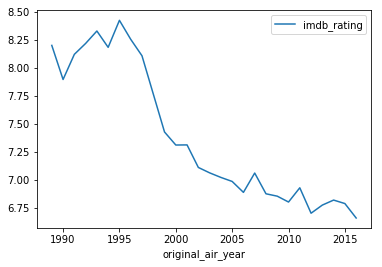

In [6]:
simpsons_eps['original_air_date'] = pd.to_datetime(simpsons_eps['original_air_date'])
simpsons_eps['original_air_year'] = simpsons_eps['original_air_date'].dt.year

simpsons_eps.pivot_table(index='original_air_year',values='imdb_rating').plot()

We can see here that according to IMDB raters, the quality of The Simpsons episodes were high in the first 6 years,and have been in a steady decline since then.

## datadotworld .query() method

Next, we will try data.world .query() function, which allows you to access data.world's query tool.

The query() function returns a QueryResults object which has three attributes, similar to the attributes of the LocalDataset object: QueryResults.dataframe, QueryResults.table, and QueryResults.raw_data.

The query tool uses dwSQL, data.world's own flavor of SQL which accepts most standard SQL functions and query types. If you pass the optional querytype='sparql' parameter to the function, it will also accept SPARQL queries.

The query tool allows you to join data from multiple data sets together, as well as retrieve subsets of larger data so that you can transfer the burden of processing larger data away from your local system.

Let's look at an example of this. simpsons_script_lines contains 158,000 lines from Simpsons episodes. Let's use the iPython magic command %timeit to time two different ways of plotting a simple analysis of which characters had the most script lines:

Reading the data into pandas from a fresh LocalDataset object before processing the data in pandas.
Using QueryResults.query() to get data.world's query tool to process the data and then return us the results.

C:\Users\LW130003\Anaconda3\lib\site-packages\datadotworld\models\dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using simpsons_script_lines schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 7
  'Error: {}'.format(resource_name, e))
C:\Users\LW130003\Anaconda3\lib\site-packages\datadotworld\util.py:136: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


1 loop, best of 1: 5.15 s per loop


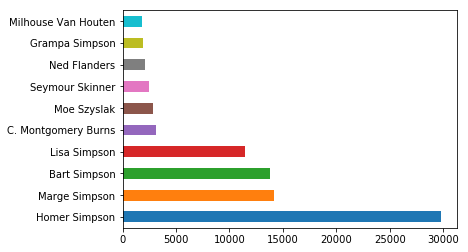

In [7]:
def pandas_lines_by_characters():
    simpsons_script = lds.dataframes['simpsons_script_lines']
    simpsons_script = simpsons_script[simpsons_script['raw_character_text'] != '']
    top_10 = simpsons_script['raw_character_text'].value_counts().head(10)
    top_10.plot.barh()

%timeit -n1 -r1 pandas_lines_by_characters()

1 loop, best of 1: 3min 18s per loop


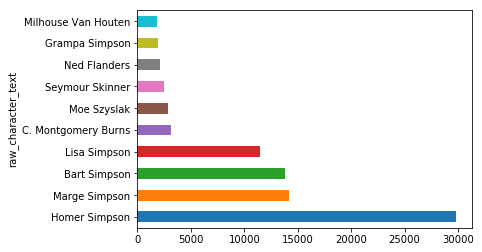

In [9]:
def query_lines_by_characters():
    lds = dw.load_dataset('data-society/the-simpsons-by-the-data',force_update=True)
    q ='''
    select
        raw_character_text,
        count(*) as num_lines
    from simpsons_script_lines
    where raw_character_text != ''
    group by raw_character_text
    order by num_lines desc;
    '''
    qr = dw.query('data-society/the-simpsons-by-the-data',q)
    top_10 = qr.dataframe.set_index('raw_character_text').head(10)
    top_10['num_lines'].plot.barh()

%timeit -n1 -r1 query_lines_by_characters()

For some reason, my computer is slower when using .query() method

Query can also be used to join data across multiple tables in a single data set, or even across multiple data sets. Let's modify our characters query to compare character lines for our top characters across the first 5 seasons:

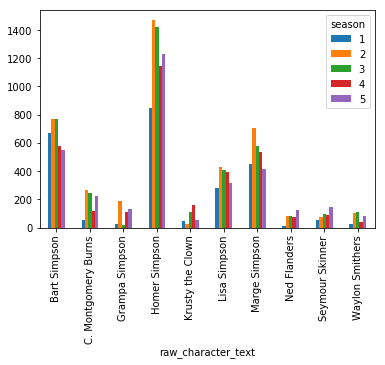

In [10]:
q ='''
select
    ssl.raw_character_text,
    se.season, count(*)
    as num_lines
from simpsons_script_lines ssl
inner join simpsons_episodes se
    on se.id = ssl.episode_id
where ssl.raw_character_text != ''
    and se.season < 6
group by
    ssl.raw_character_text,
    se.season
order by num_lines desc;
'''
qr = dw.query('data-society/the-simpsons-by-the-data',q)
df = qr.dataframe
char_counts = df.pivot_table(index='raw_character_text',
                              values='num_lines',aggfunc=sum)
top_10_chars = char_counts.sort_values(by='num_lines', ascending=False).iloc[:10].index
top_10 = df[df['raw_character_text'].isin(top_10_chars)]
pivot = top_10.pivot_table(index='raw_character_text',
                           columns='season',values='num_lines')
pivot.plot.bar()

## Using the data.world API
In addition to load_dataset() and query(), the data.world library offers a wrapper around the full data.world API, which gives you access to a number of powerful functions that allow you to read, create and modify data sets on data.world.

To demonstrate this, let's add the chalkboard gags from the start of each Simpsons episode to the simpsons_episodes file. Note that you would need to be a contributor or owner to the dataset to be able to make changes using the API.

We're going to start by pulling down a list of chalkboard gags from the web, cleaning them to be ready to joined to the main table.

In [11]:
# create a list of dataframes from the tables listed on simpsons.wikia.co,
chalkboard_dfs = pd.read_html('http://simpsons.wikia.com/wiki/List_of_chalkboard_gags',match='Gag')
# remove the simpsons movie from the list
chalkboard_dfs = [i for i in chalkboard_dfs if i.shape[0] != 2]
# inspect the format of our dataframes
print(chalkboard_dfs[0].shape)
chalkboard_dfs[0].head()

(14, 4)


,0,1,2,3
0,#,Airdate/Episode Title,Screenshot,Chalkboard Gag/Note
1,1,"December 17, 1989""Simpsons Roasting on an Open...","<img src=""https://vignette.wikia.nocookie.net/...",(no gag)
2,2,"January 14, 1990""Bart the Genius""","<img src=""https://vignette.wikia.nocookie.net/...",I will not waste chalk.
3,3,"January 21, 1990""Homer's Odyssey""","<img src=""https://vignette.wikia.nocookie.net/...",I will not skateboard in the halls.
4,4,"January 28, 1990""There's No Disgrace Like Home""","<img src=""https://vignette.wikia.nocookie.net/...",I will not burp in class.


In [12]:
# the first row contains the column names, let's create a function to fix this
def cb_cleanup(df):
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    return df
# and then apply the function to the whole list
chalkboard_dfs = [cb_cleanup(i) for i in chalkboard_dfs]
# join the list of dataframes into one big dataframe
chalkboards = pd.concat(chalkboard_dfs,ignore_index=True)
# remove bad row without an id
chalkboards = chalkboards[pd.notnull(chalkboards['#'])]
print(chalkboards.shape)
chalkboards.head()

(631, 7)


,#,Airdate,Airdate/Episode Title,Chalkboard Gag/Note,Episode title,Gag,Screenshot
0,1,NaN,"December 17, 1989""Simpsons Roasting on an Open...",(no gag),NaN,NaN,"<img src=""https://vignette.wikia.nocookie.net/..."
1,2,NaN,"January 14, 1990""Bart the Genius""",I will not waste chalk.,NaN,NaN,"<img src=""https://vignette.wikia.nocookie.net/..."
2,3,NaN,"January 21, 1990""Homer's Odyssey""",I will not skateboard in the halls.,NaN,NaN,"<img src=""https://vignette.wikia.nocookie.net/..."
3,4,NaN,"January 28, 1990""There's No Disgrace Like Home""",I will not burp in class.,NaN,NaN,"<img src=""https://vignette.wikia.nocookie.net/..."
4,5,NaN,"February 4, 1990""Bart the General""",(no gag)Shortened opening,NaN,NaN,"<img src=""https://vignette.wikia.nocookie.net/..."


The reason why this messiness happen is because season 1-5 use different column names Airdate/Episode Title and Chalkboard Gag/Note. While the rest of the season use Episode title and Gag.

In [14]:
temp = chalkboards.loc[chalkboards['Episode title'].isnull()]
temp2 = chalkboards.loc[chalkboards['Episode title'].notnull()]
def find_title(text):
    title_no = text.find('"')
    airdate = text[0:title_no]
    title = text[title_no:]
    return airdate, title

for i in range(temp.shape[0]):
    air , title = find_title(temp.loc[i,'Airdate/Episode Title'])
    temp.loc[i,'Airdate'] = air
    temp.loc[i,'Episode title'] = title
    
temp['Gag'] = temp['Chalkboard Gag/Note']
chalkboards = pd.concat([temp, temp2])
chalkboards.drop(['Airdate/Episode Title','Chalkboard Gag/Note', 'Screenshot'], axis=1, inplace=True)
chalkboards.head()

C:\Users\LW130003\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\LW130003\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\LW1

,#,Airdate,Episode title,Gag
0,1,"December 17, 1989","""Simpsons Roasting on an Open Fire""",(no gag)
1,2,"January 14, 1990","""Bart the Genius""",I will not waste chalk.
2,3,"January 21, 1990","""Homer's Odyssey""",I will not skateboard in the halls.
3,4,"January 28, 1990","""There's No Disgrace Like Home""",I will not burp in class.
4,5,"February 4, 1990","""Bart the General""",(no gag)Shortened opening


In [15]:
# remove extra columns and normalize column names
chalkboards = chalkboards[['#','Gag']]
chalkboards.columns = ['id','chalkboard_gag']

In [16]:
chalkboards['id'].values

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39',
       '<img src="https://vignette.wikia.nocookie.net/simpsons/images/d/da/Bart_the_Murderer_47.JPG/revision/latest/scale-to-width-down/200?cb=20130612014818" alt="Bart the Murderer 47" class="" data-image-key="Bart_the_Murderer_47.JPG" data-image-name="Bart the Murderer 47.JPG" width="200" height="150" >',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53',
       '<img src="https://vignette.wikia.nocookie.net/simpsons/images/b/bb/Separate_Vocations_119.JPG/revision/latest/scale-to-width-down/200?cb=20130620040941" alt="Separate Vocations 119" class="" data-image-key="Separate_Vocations_119.JPG" data-image-name="Separate Vocations 119.JPG" width="200" height="150" >',
       '54', '55', '56'

In order to turn 'id' into string there are 3 values that need to be dropped / replaced

In [17]:
chalkboards['id'][39]

'<img src="https://vignette.wikia.nocookie.net/simpsons/images/d/da/Bart_the_Murderer_47.JPG/revision/latest/scale-to-width-down/200?cb=20130612014818" alt="Bart the Murderer 47" class="" data-image-key="Bart_the_Murderer_47.JPG" data-image-name="Bart the Murderer 47.JPG" width="200" height="150" >'

In [18]:
chalkboards['id'][54]

'<img src="https://vignette.wikia.nocookie.net/simpsons/images/b/bb/Separate_Vocations_119.JPG/revision/latest/scale-to-width-down/200?cb=20130620040941" alt="Separate Vocations 119" class="" data-image-key="Separate_Vocations_119.JPG" data-image-name="Separate Vocations 119.JPG" width="200" height="150" >'

In [19]:
chalkboards['id'][609]

'608/609'

In [20]:
df = pd.DataFrame([[608, 'no gag'], [609, 'no gag']], columns=['id', 'chalkboard_gag'])
chalkboards = chalkboards.append(df)
chalkboards.drop(index=[39,54,609], inplace=True, axis=0)

In [21]:
# convert id column to int
chalkboards['id'] = chalkboards['id'].astype(int)
chalkboards = chalkboards.sort_values(by='id')
chalkboards.drop_duplicates(inplace=True)
chalkboards.head()

,id,chalkboard_gag
0,1,(no gag)
1,2,I will not waste chalk.
2,3,I will not skateboard in the halls.
3,4,I will not burp in class.
4,5,(no gag)Shortened opening


Join chalkboards word with original datasets

In [22]:
simpsons_episodes = lds.dataframes['simpsons_episodes']
simpsons_episodes = simpsons_episodes.merge(chalkboards,how='left',on='id')
simpsons_episodes.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views,chalkboard_gag
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0,"I will not call my teacher ""Hot Cakes""."
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0,"They are laughing at me, not with me."
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0,I will not encourage others to fly. (And durin...
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0,Original version:I will not Xerox my butt. Alt...
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0,I am not a 32 year old woman.At the time of th...


In [23]:
# output
simpsons_episodes.to_csv(r'C:\Users\LW130003\Desktop\simpsons_episode.csv', index=False)